This first attempt is the implementation of deep Q learning to control 1 misconfiguration inverter. <br/>
Feeder: feeder13_U_R_Pecan_Solar, has one inverter.


In [2]:

from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import numpy as np

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']

DSSText.command = 'Compile C:/feeders/feeder13_U_R_Pecan_Solar/feeder13_U_R_Pecan_Solar.dss'
# This is a quick way to change properties of a specific group of device, here the regulator and cap controls are enabled
setRegInfo(DSSObj,list(DSSCircuit.RegControls.AllNames),'enabled',[1]* len(DSSCircuit.RegControls.AllNames))
setCapControlInfo(DSSObj,list(DSSCircuit.CapControls.AllNames),'enabled',[1]*len(DSSCircuit.CapControls.AllNames))


DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=1440 # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation
DSSSolution.Solve()

Monitor Name: meter_632_power


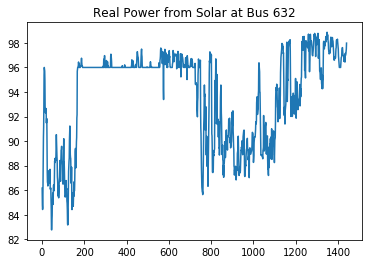

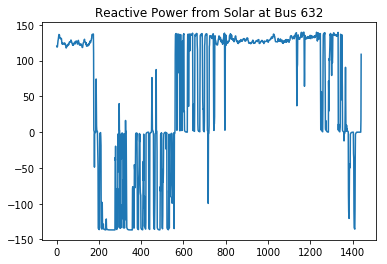

{'name': 'vv_curve_deadband', 'npts': 6, 'xarray': array([0.5 , 0.98, 0.99, 1.01, 1.02, 1.5 ]), 'yarray': array([ 1.,  1.,  0.,  0., -1., -1.])}


In [9]:
DSSMon=DSSCircuit.Monitors
DSSMon.Name='Meter_632_power'
print('Monitor Name: ' + DSSMon.Name )

#print(DSSMon.dblHour)
time=3600*np.asarray((DSSMon.dblHour))
Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

# Generation is negative in OpenDSS hence, multiply by -1
plt.figure()
plt.plot(time,-Real_power)
plt.title('Real Power from Solar at Bus 632')
plt.show()

plt.figure()
plt.plot(time,-Reactive_power)
plt.title('Reactive Power from Solar at Bus 632')
plt.show()

#DSSMon=DSSCircuit.Monitors
#DSSMon.Name='Meter_692_power'

#Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
#Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

#plt.figure()
#plt.plot(time,-Real_power)
#plt.title('Real Power from Solar at Bus 692')
#plt.show()

#plt.figure()
#plt.plot(time,-Reactive_power)
#plt.title('Reactive Power from Solar at Bus 692')
#plt.show()


# Getting a specific xycurve
xycurves=getXYCurveInfo(DSSObj,['vv_curve_deadband'])
# because it returns a list
vw_curve=xycurves[0]
# print to console
print(vw_curve)
# Change one parameter of the curve
#vw_curve['xarray']=np.asarray([1,1,1,1])
# making sure that the change happened
#print(vw_curve)
# set the curveinformation
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

# make sure that the change happened
#xycurves=getXYCurveInfo(DSSObj,['vw_curve'])
#vw_curve=xycurves[0]
#print(vw_curve)

# Error Checking, this will generate an error as npts do not match the length of the xarray
#vw_curve['xarray']=np.asarray([1,1,1,1,1])
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

(' V1', ' VAngle1', ' V2', ' VAngle2', ' V3', ' VAngle3', ' I1', ' IAngle1', ' I2', ' IAngle2', ' I3', ' IAngle3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


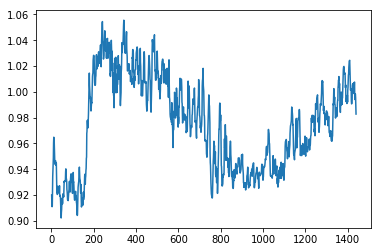

In [10]:
DSSMon.Name='Meter_632_voltage'
# just printing the meter headers
print(DSSMon.header)
# Unfortunately the channel does not have the time information (still under investigation)
time=3600*np.asarray(list(DSSMon.dblHour)) # Multiplying by 3600 converts it to seconds
# Reading the Voltage
Voltage_Phasea=np.asarray(DSSMon.Channel(1))
Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
Voltage_Phasec=np.asarray(DSSMon.Channel(5))
Voltage=Voltage_Phasea +Voltage_Phaseb+Voltage_Phasec
# dividing by the base and also taking average
plt.plot(time,Voltage/(3*2400))
plt.show()

###########################################################################################
###########################################################################################
###########################################################################################

0.0% 0.07% 0.14% 0.21% 0.28% 0.35% 0.42% 0.49% 0.56% 0.62% 0.69% 0.76% 0.83% 0.9% 0.97% 1.04% 1.11% 1.18% 1.25% 1.32% 1.39% 1.46% 1.53% 1.6% 1.67% 1.73% 1.8% 1.87% 1.94% 2.01% 2.08% 2.15% 2.22% 2.29% 2.36% 2.43% 2.5% 2.57% 2.64% 2.71% 2.78% 2.85% 2.91% 2.98% 3.05% 3.12% 3.19% 3.26% 3.33% 3.4% 3.47% 3.54% 3.61% 3.68% 3.75% 3.82% 3.89% 3.96% 4.02% 4.09% 4.16% 4.23% 4.3% 4.37% 4.44% 4.51% 4.58% 4.65% 4.72% 4.79% 4.86% 4.93% 5.0% 5.07% 5.14% 5.2% 5.27% 5.34% 5.41% 5.48% 5.55% 5.62% 5.69% 5.76% 5.83% 5.9% 5.97% 6.04% 6.11% 6.18% 6.25% 6.32% 6.38% 6.45% 6.52% 6.59% 6.66% 6.73% 6.8% 6.87% 6.94% 7.01% 7.08% 7.15% 7.22% 7.29% 7.36% 7.43% 7.49% 7.56% 7.63% 7.7% 7.77% 7.84% 7.91% 7.98% 8.05% 8.12% 8.19% 8.26% 8.33% 8.4% 8.47% 8.54% 8.61% 8.67% 8.74% 8.81% 8.88% 8.95% 9.02% 9.09% 9.16% 9.23% 9.3% 9.37% 9.44% 9.51% 9.58% 9.65% 9.72% 9.78% 9.85% 9.92% 9.99% 10.06% 10.13% 10.2% 10.27% 10.34% 10.41% 10.48% 10.55% 10.62% 10.69% 10.76% 10.83% 10.9% 10.96% 11.03% 11.1% 11.17% 11.24% 11.31% 11.38% 11.45% 

84.87% 84.94% 85.01% 85.08% 85.15% 85.22% 85.29% 85.36% 85.43% 85.5% 85.57% 85.63% 85.7% 85.77% 85.84% 85.91% 85.98% 86.05% 86.12% 86.19% 86.26% 86.33% 86.4% 86.47% 86.54% 86.61% 86.68% 86.75% 86.81% 86.88% 86.95% 87.02% 87.09% 87.16% 87.23% 87.3% 87.37% 87.44% 87.51% 87.58% 87.65% 87.72% 87.79% 87.86% 87.93% 87.99% 88.06% 88.13% 88.2% 88.27% 88.34% 88.41% 88.48% 88.55% 88.62% 88.69% 88.76% 88.83% 88.9% 88.97% 89.04% 89.1% 89.17% 89.24% 89.31% 89.38% 89.45% 89.52% 89.59% 89.66% 89.73% 89.8% 89.87% 89.94% 90.01% 90.08% 90.15% 90.22% 90.28% 90.35% 90.42% 90.49% 90.56% 90.63% 90.7% 90.77% 90.84% 90.91% 90.98% 91.05% 91.12% 91.19% 91.26% 91.33% 91.39% 91.46% 91.53% 91.6% 91.67% 91.74% 91.81% 91.88% 91.95% 92.02% 92.09% 92.16% 92.23% 92.3% 92.37% 92.44% 92.51% 92.57% 92.64% 92.71% 92.78% 92.85% 92.92% 92.99% 93.06% 93.13% 93.2% 93.27% 93.34% 93.41% 93.48% 93.55% 93.62% 93.68% 93.75% 93.82% 93.89% 93.96% 94.03% 94.1% 94.17% 94.24% 94.31% 94.38% 94.45% 94.52% 94.59% 94.66% 94.73% 94.8% 94.86%

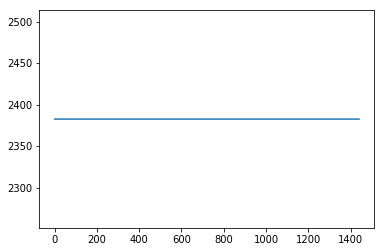

In [19]:
# This code runs the 13 Node Balanced Model using the Python OpenDSS interface
# The code also runs the custom FBS functions to compare the results
# Please make sure you have the necessary libraries, and the required libraries are in the same folder with the MATLAB code
# Be advised: While Running OpenDSS, python changes the current directory, hence the matlab code is run first to avoid additional coding
# Make sure you have the updated version of Anaconda for all libraries to run, OpenDSS installed 
# For a custom made dictionary, the key is always in lower case
from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import tan,acos
import os

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']
DSSMon=DSSCircuit.Monitors
power_factor=0.9
reactivepowercontribution=tan(acos(power_factor))
NodeVoltageToPlot=634
IncludeSolar=1
SlackBusVoltage=1.0
DSSText.Command="Compile C:/feeders/feeder13_B_R/feeder13BR.dss"

LoadBusNames=['load_634','load_645','load_646','load_652','load_671','load_675','load_692','load_611']
LoadList=np.array([6,7,8,13,3,12,11,10])-1
#get the real load from Texas day
Load=pd.read_csv('C:/feeders/13busload.csv',header=None)
Load=1/1000*(Load.values)
#get the real solar from Texas day
Solar=pd.read_csv('C:/feeders/Solar.csv',header=None)
Solar=1/1000*(Solar.values)
TotalTimeSteps,Nodes= Load.shape # Initialize the total time steps according to the data

DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=1 # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation

VoltageOpenDSS=np.zeros(shape=(TotalTimeSteps,)) #save voltage at each step into this array
#SubstationRealPowerOpenDSS=np.zeros(shape=(TotalTimeSteps,)) #save real power at each step into this array
setSourceInfo(DSSObj,['source'],'pu',[SlackBusVoltage]) # Setting the slack bus voltage
#BusVoltageToPlot='bus_'+ str(NodeVoltageToPlot)

for ksim in range(TotalTimeSteps):
    print(round(ksim/TotalTimeSteps*100, 2), end="% ")
    # Setting the real and reactive power of the loads
    setLoadInfo(DSSObj,LoadBusNames,'kw',Load[ksim][LoadList]-IncludeSolar*Solar[ksim][LoadList])
    setLoadInfo(DSSObj, LoadBusNames, 'kvar', reactivepowercontribution*(Load[ksim][LoadList] - IncludeSolar*Solar[ksim][LoadList]))
    # Solving the OpenDSS Power FLow
    DSSSolution.Solve()
    #LineInfo=getLineInfo(DSSObj,['L_U_650'])
    #bus1power = [d['bus1powerreal'] for d in LineInfo]
    #SubstationRealPowerOpenDSS[ksim]=bus1power[0] # This is done as the variable is a list, and the first element of the list, this can be done by doing a list.append, but array is done for speed issue
    #BusInfo=getBusInfo(DSSObj,[BusVoltageToPlot])
    #voltagepu=[d['voltagepu'] for d in BusInfo]
    #VoltageOpenDSS[ksim]=voltagepu[0]
    DSSMon.Name='meter_634_voltage'
    Voltage_Phasea=np.asarray(DSSMon.Channel(1))
    Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
    Voltage_Phasec=np.asarray(DSSMon.Channel(5))
    VoltageOpenDSS[ksim]=(Voltage_Phasea[0]+Voltage_Phaseb[0]+Voltage_Phasec[0])/3
    

    plt.plot(VoltageOpenDSS)

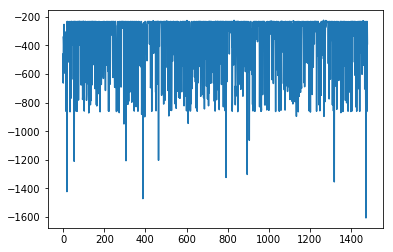

In [2]:
from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import numpy as np
pt = [-460, -663, -338, -364, -442, -253, -493, -322, -382, -594, -505, -537, -344, -306, -860, -517, -848, -809, -314, -1422, -233, -468, -233, -233, -517, -240, -331, -277, -295, -242, -233, -280, -481, -237, -864, -233, -271, -390, -770, -550, -233, -232, -637, -248, -298, -396, -234, -328, -233, -233, -233, -233, -394, -345, -1210, -583, -232, -274, -276, -233, -233, -233, -244, -860, -858, -233, -292, -681, -829, -860, -233, -233, -566, -233, -311, -782, -571, -233, -231, -233, -233, -233, -397, -350, -233, -270, -233, -253, -677, -244, -233, -233, -233, -233, -233, -778, -755, -233, -637, -231, -234, -487, -234, -859, -235, -288, -391, -232, -233, -233, -659, -233, -294, -542, -784, -742, -234, -357, -242, -233, -667, -239, -233, -241, -283, -872, -233, -233, -408, -234, -235, -233, -233, -815, -260, -786, -233, -233, -244, -233, -677, -424, -233, -233, -233, -278, -232, -233, -362, -348, -535, -234, -233, -237, -233, -702, -276, -233, -534, -233, -233, -233, -815, -436, -823, -713, -742, -234, -282, -264, -717, -233, -374, -737, -247, -233, -233, -445, -303, -251, -864, -668, -235, -314, -343, -482, -673, -572, -235, -453, -319, -356, -573, -260, -616, -233, -631, -534, -233, -233, -233, -233, -239, -236, -328, -292, -715, -236, -423, -248, -461, -233, -524, -233, -539, -234, -235, -233, -233, -582, -254, -859, -233, -860, -691, -269, -233, -234, -311, -671, -235, -288, -233, -288, -287, -233, -327, -233, -293, -233, -233, -515, -624, -243, -233, -235, -233, -233, -445, -541, -587, -693, -233, -356, -233, -233, -255, -695, -357, -862, -860, -476, -857, -548, -378, -260, -740, -233, -266, -294, -240, -327, -702, -870, -342, -233, -233, -317, -233, -285, -321, -470, -691, -233, -233, -279, -233, -233, -279, -233, -233, -256, -233, -233, -233, -813, -949, -292, -345, -233, -637, -259, -233, -233, -233, -384, -1206, -675, -233, -608, -308, -340, -233, -483, -758, -812, -233, -271, -558, -790, -233, -352, -265, -281, -727, -714, -236, -233, -233, -233, -233, -335, -233, -572, -797, -488, -368, -233, -233, -393, -622, -233, -313, -355, -275, -233, -859, -235, -233, -650, -789, -422, -239, -233, -244, -828, -233, -269, -233, -346, -256, -802, -236, -329, -860, -233, -233, -248, -477, -233, -235, -234, -311, -238, -540, -411, -370, -549, -250, -233, -233, -235, -882, -739, -410, -862, -665, -451, -1471, -249, -513, -817, -240, -331, -272, -275, -272, -899, -233, -233, -233, -248, -320, -462, -277, -437, -260, -300, -507, -236, -233, -233, -233, -233, -237, -233, -235, -246, -246, -233, -391, -233, -233, -233, -244, -696, -686, -353, -233, -474, -298, -861, -357, -607, -247, -458, -352, -235, -227, -274, -232, -454, -428, -420, -343, -233, -345, -327, -297, -233, -727, -233, -857, -448, -233, -233, -233, -672, -555, -233, -233, -234, -231, -233, -1203, -236, -238, -279, -407, -236, -233, -240, -239, -233, -233, -233, -236, -233, -295, -749, -340, -233, -733, -448, -388, -235, -233, -233, -338, -810, -233, -233, -233, -492, -233, -233, -783, -233, -233, -555, -303, -331, -235, -233, -228, -233, -299, -293, -365, -233, -715, -298, -306, -233, -893, -319, -338, -270, -659, -727, -233, -233, -626, -233, -853, -239, -234, -855, -633, -233, -492, -234, -511, -349, -234, -235, -232, -233, -464, -309, -233, -287, -426, -262, -808, -464, -233, -596, -277, -703, -840, -236, -233, -233, -315, -233, -233, -721, -233, -243, -251, -254, -764, -236, -364, -263, -734, -587, -770, -398, -233, -233, -233, -300, -712, -514, -718, -724, -286, -233, -233, -542, -243, -245, -232, -233, -314, -803, -822, -388, -233, -233, -337, -233, -233, -233, -242, -755, -233, -404, -857, -449, -226, -598, -228, -808, -303, -303, -945, -412, -235, -347, -233, -752, -239, -306, -849, -539, -859, -858, -853, -289, -803, -807, -233, -684, -281, -702, -388, -519, -258, -474, -233, -234, -534, -564, -243, -233, -249, -622, -233, -233, -472, -655, -475, -385, -403, -838, -233, -233, -337, -273, -860, -295, -234, -233, -233, -661, -233, -233, -233, -233, -547, -233, -233, -233, -232, -232, -387, -756, -476, -256, -303, -606, -233, -233, -271, -582, -263, -743, -233, -233, -233, -765, -347, -233, -566, -844, -233, -496, -305, -446, -233, -233, -234, -464, -385, -685, -233, -327, -234, -246, -774, -246, -312, -233, -233, -822, -233, -481, -732, -232, -345, -233, -233, -232, -233, -250, -665, -233, -233, -233, -233, -233, -294, -234, -271, -300, -300, -589, -250, -664, -494, -233, -368, -790, -234, -234, -239, -859, -607, -231, -649, -587, -537, -233, -780, -244, -379, -232, -233, -470, -233, -232, -250, -713, -233, -470, -317, -849, -233, -532, -242, -233, -232, -237, -255, -233, -422, -233, -673, -233, -364, -334, -233, -234, -236, -232, -358, -829, -261, -233, -233, -734, -400, -518, -468, -525, -857, -233, -232, -328, -1323, -860, -233, -233, -234, -653, -233, -233, -276, -299, -273, -233, -233, -234, -233, -260, -460, -271, -233, -287, -233, -311, -235, -243, -233, -233, -233, -233, -412, -233, -860, -787, -277, -233, -309, -233, -260, -537, -252, -225, -233, -233, -233, -233, -232, -815, -683, -756, -644, -447, -316, -233, -233, -269, -232, -264, -233, -863, -233, -475, -240, -232, -674, -362, -246, -412, -275, -234, -243, -233, -238, -238, -707, -383, -286, -233, -233, -264, -687, -398, -594, -233, -755, -270, -302, -233, -233, -244, -233, -341, -233, -547, -233, -282, -583, -311, -233, -233, -233, -233, -376, -1053, -309, -1302, -233, -460, -290, -361, -233, -549, -582, -240, -318, -1063, -560, -279, -279, -235, -572, -234, -233, -233, -518, -379, -486, -287, -296, -604, -353, -813, -241, -858, -332, -233, -336, -744, -362, -234, -233, -233, -861, -233, -271, -275, -233, -327, -233, -355, -233, -238, -234, -234, -235, -374, -243, -245, -233, -233, -233, -265, -233, -233, -250, -829, -493, -233, -233, -233, -588, -425, -861, -827, -855, -233, -233, -233, -233, -233, -744, -256, -233, -232, -233, -240, -268, -233, -233, -233, -816, -246, -332, -815, -273, -703, -333, -237, -269, -703, -851, -738, -233, -446, -292, -233, -233, -337, -240, -277, -854, -243, -785, -233, -233, -235, -233, -258, -232, -233, -321, -233, -229, -243, -378, -639, -428, -239, -234, -232, -325, -337, -666, -233, -292, -233, -243, -233, -356, -343, -236, -244, -431, -862, -262, -570, -233, -233, -233, -422, -233, -233, -295, -368, -609, -280, -250, -233, -855, -673, -772, -860, -409, -703, -649, -264, -233, -233, -773, -853, -233, -233, -450, -231, -233, -233, -270, -234, -239, -233, -255, -667, -530, -364, -619, -711, -402, -360, -233, -852, -233, -233, -233, -440, -233, -366, -299, -307, -683, -236, -234, -722, -233, -233, -474, -688, -252, -332, -233, -233, -233, -232, -382, -778, -245, -233, -746, -324, -305, -233, -344, -246, -350, -791, -309, -708, -276, -809, -233, -227, -233, -238, -368, -236, -233, -646, -233, -793, -234, -399, -421, -376, -304, -714, -896, -233, -541, -275, -337, -233, -525, -233, -345, -864, -233, -233, -613, -756, -325, -233, -291, -234, -398, -523, -728, -269, -632, -356, -677, -699, -233, -233, -234, -250, -263, -233, -233, -233, -233, -355, -660, -233, -407, -251, -689, -382, -264, -392, -242, -504, -233, -520, -319, -317, -288, -233, -233, -247, -298, -233, -245, -527, -294, -233, -390, -857, -478, -664, -591, -442, -320, -233, -866, -233, -233, -233, -340, -235, -436, -233, -618, -743, -233, -238, -234, -483, -552, -420, -233, -233, -233, -390, -233, -233, -232, -234, -233, -233, -233, -233, -306, -233, -860, -513, -233, -242, -474, -236, -348, -232, -397, -420, -316, -815, -245, -447, -420, -247, -857, -388, -250, -378, -570, -246, -749, -233, -494, -428, -283, -233, -427, -469, -233, -233, -363, -233, -224, -684, -896, -233, -233, -237, -695, -793, -369, -233, -274, -226, -233, -256, -233, -233, -233, -233, -233, -233, -233, -233, -234, -527, -289, -233, -406, -774, -233, -233, -233, -233, -233, -636, -256, -249, -339, -233, -233, -365, -235, -233, -241, -816, -308, -233, -233, -318, -858, -323, -1046, -804, -1354, -233, -233, -233, -479, -548, -304, -271, -685, -325, -233, -233, -847, -461, -386, -234, -233, -293, -311, -233, -351, -317, -645, -578, -328, -630, -241, -354, -233, -233, -236, -233, -870, -378, -336, -233, -233, -233, -233, -377, -403, -327, -862, -233, -260, -547, -233, -233, -233, -233, -233, -271, -350, -233, -784, -253, -740, -465, -251, -235, -801, -233, -720, -377, -733, -393, -469, -860, -233, -527, -302, -234, -709, -359, -341, -370, -235, -728, -233, -234, -862, -348, -233, -233, -233, -860, -233, -233, -236, -233, -233, -233, -233, -233, -238, -335, -241, -233, -517, -233, -233, -609, -312, -414, -233, -238, -831, -234, -241, -860, -587, -560, -384, -233, -577, -289, -238, -233, -233, -572, -704, -684, -232, -857, -861, -250, -452, -234, -232, -233, -233, -258, -233, -282, -539, -602, -380, -530, -373, -460, -227, -386, -439, -535, -539, -297, -233, -244, -705, -233, -233, -233, -594, -839, -1606, -234, -741, -233, -862, -233, -233, -389]
plt.plot(pt)
plt.show()

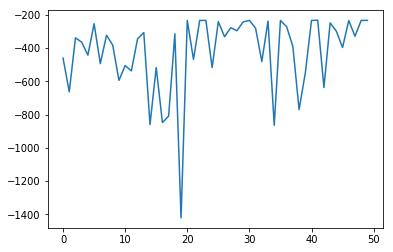

In [6]:
plt.plot(pt[:50])

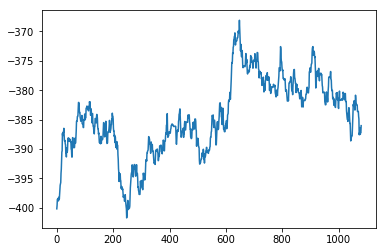

In [12]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
yMA = movingaverage(pt,400)
plt.plot(yMA)
plt.show()

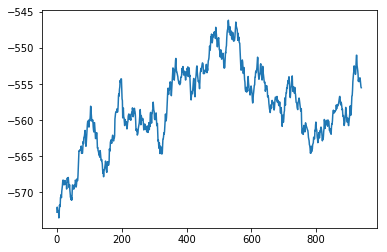

In [16]:
########### second attempt with larger buffer#########
pt =[-743,-513,-365,-449,-805,-340,-582,-860,-616,-808,-848,-551,-572,-233,-679,-824,-536,-755,-820,-638,-426,-346,-843,-800,-836,-408,-658,-854,-792,-389,-804,-429,-427,-684,-554,-413,-578,-451,-690,-417,-559,-526,-713,-401,-394,-580,-752,-871,-635,-762,-857,-446,-449,-715,-651,-452,-754,-277,-404,-416,-871,-497,-549,-592,-642,-840,-881,-808,-671,-498,-824,-791,-275,-564,-478,-381,-546,-386,-233,-763,-792,-329,-1126,-562,-776,-629,-798,-233,-252,-512,-634,-602,-784,-609,-680,-318,-490,-637,-703,-861,-361,-346,-763,-902,-415,-336,-427,-675,-635,-796,-789,-370,-393,-533,-854,-460,-363,-490,-364,-570,-458,-716,-507,-334,-233,-757,-640,-782,-452,-295,-317,-280,-743,-742,-523,-478,-241,-569,-363,-358,-269,-327,-480,-335,-860,-706,-630,-637,-665,-594,-676,-328,-278,-442,-660,-601,-428,-310,-254,-620,-630,-1327,-649,-687,-714,-430,-585,-234,-288,-489,-522,-704,-401,-575,-508,-527,-380,-1027,-1583,-687,-730,-409,-648,-599,-538,-539,-702,-630,-730,-861,-705,-692,-851,-570,-738,-715,-715,-452,-757,-267,-229,-539,-433,-830,-634,-233,-535,-576,-595,-860,-757,-533,-628,-380,-349,-483,-625,-517,-427,-627,-881,-634,-357,-681,-757,-609,-234,-233,-908,-658,-630,-334,-711,-488,-314,-615,-746,-760,-849,-446,-307,-233,-391,-233,-701,-242,-605,-233,-473,-722,-639,-349,-468,-748,-671,-517,-787,-424,-233,-886,-632,-305,-351,-643,-587,-751,-322,-260,-597,-425,-446,-490,-465,-626,-400,-692,-320,-576,-485,-298,-404,-589,-441,-832,-860,-840,-623,-1109,-861,-233,-425,-248,-1222,-837,-759,-856,-876,-427,-235,-325,-229,-379,-509,-836,-666,-784,-354,-248,-328,-371,-233,-256,-678,-479,-526,-856,-238,-327,-785,-437,-838,-348,-554,-743,-858,-743,-772,-473,-742,-852,-461,-556,-680,-645,-821,-424,-459,-860,-774,-906,-875,-709,-786,-427,-390,-775,-831,-860,-694,-612,-867,-234,-233,-629,-795,-652,-955,-553,-524,-570,-485,-232,-517,-835,-721,-706,-602,-283,-355,-478,-610,-610,-500,-218,-439,-231,-392,-616,-606,-821,-489,-719,-488,-604,-469,-613,-353,-690,-683,-574,-586,-718,-274,-480,-234,-251,-354,-699,-689,-233,-671,-850,-522,-856,-239,-488,-520,-582,-253,-818,-371,-234,-428,-640,-791,-732,-826,-660,-752,-682,-607,-698,-441,-388,-546,-666,-1145,-1092,-734,-715,-845,-382,-234,-628,-509,-406,-416,-363,-350,-415,-700,-854,-720,-505,-536,-593,-800,-808,-540,-633,-424,-233,-342,-509,-565,-513,-773,-234,-235,-504,-789,-374,-298,-735,-346,-742,-587,-569,-629,-563,-841,-544,-421,-834,-870,-335,-564,-546,-429,-681,-778,-488,-858,-616,-655,-791,-860,-413,-361,-1012,-304,-494,-423,-313,-306,-860,-842,-507,-375,-379,-394,-684,-536,-468,-724,-806,-258,-296,-730,-779,-233,-559,-376,-432,-233,-652,-318,-449,-744,-751,-382,-616,-595,-812,-766,-659,-682,-761,-759,-832,-233,-238,-574,-814,-238,-715,-801,-630,-487,-802,-798,-782,-580,-702,-234,-757,-233,-346,-630,-860,-883,-614,-233,-773,-502,-452,-434,-356,-809,-330,-598,-285,-669,-590,-297,-231,-336,-255,-694,-453,-773,-826,-233,-550,-234,-888,-508,-409,-225,-322,-440,-463,-722,-507,-686,-410,-659,-731,-847,-513,-242,-233,-360,-269,-480,-294,-706,-815,-731,-342,-466,-290,-404,-289,-451,-830,-743,-837,-679,-678,-851,-811,-622,-649,-233,-433,-651,-860,-808,-545,-479,-345,-477,-779,-857,-721,-848,-838,-565,-439,-246,-491,-290,-833,-842,-691,-311,-495,-528,-504,-662,-582,-233,-816,-460,-644,-560,-490,-482,-369,-880,-615,-504,-507,-290,-238,-473,-276,-489,-535,-487,-420,-810,-544,-233,-338,-510,-344,-419,-233,-352,-567,-689,-647,-545,-394,-324,-860,-424,-461,-537,-326,-664,-601,-321,-686,-777,-519,-327,-234,-580,-842,-385,-406,-299,-828,-505,-429,-764,-1068,-809,-660,-1628,-381,-400,-822,-612,-851,-867,-436,-861,-749,-450,-470,-595,-662,-482,-233,-344,-249,-789,-577,-735,-498,-635,-860,-233,-346,-494,-653,-490,-480,-268,-703,-715,-533,-463,-860,-525,-602,-395,-448,-829,-861,-633,-352,-504,-625,-416,-627,-338,-233,-351,-599,-379,-233,-429,-860,-852,-244,-750,-458,-396,-575,-547,-857,-689,-579,-314,-417,-325,-554,-778,-621,-342,-552,-692,-397,-253,-483,-667,-341,-396,-446,-1350,-417,-822,-281,-716,-479,-385,-784,-613,-789,-513,-825,-357,-698,-549,-363,-750,-437,-523,-581,-569,-664,-860,-625,-276,-276,-860,-848,-600,-860,-718,-483,-655,-649,-272,-601,-739,-516,-860,-725,-861,-276,-233,-465,-563,-603,-543,-378,-291,-350,-295,-896,-459,-642,-406,-356,-233,-391,-618,-832,-416,-422,-881,-629,-367,-720,-780,-686,-712,-235,-288,-438,-410,-289,-780,-389,-704,-784,-227,-495,-430,-251,-474,-860,-717,-480,-715,-748,-577,-441,-503,-406,-419,-615,-678,-582,-627,-351,-424,-624,-237,-233,-586,-404,-604,-906,-842,-493,-367,-345,-507,-371,-575,-462,-365,-414,-468,-615,-639,-644,-908,-228,-262,-499,-860,-725,-877,-785,-871,-847,-515,-456,-956,-474,-681,-359,-333,-487,-929,-919,-638,-825,-564,-401,-613,-359,-560,-277,-664,-860,-819,-518,-372,-426,-535,-705,-239,-234,-616,-297,-720,-368,-704,-652,-439,-670,-509,-859,-239,-366,-805,-402,-672,-292,-229,-317,-496,-811,-437,-416,-517,-396,-262,-499,-494,-240,-348,-766,-478,-383,-389,-406,-314,-763,-818,-535,-401,-601,-695,-537,-563,-889,-733,-642,-604,-235,-600,-678,-762,-609,-544,-617,-503,-560,-275,-860,-742,-713,-747,-735,-233,-805,-473,-722,-714,-555,-353,-266,-534,-678,-838,-370,-617,-303,-335,-231,-412,-242,-470,-263,-423,-475,-583,-279,-650,-1108,-596,-455,-442,-542,-816,-619,-602,-739,-860,-857,-860,-281,-696,-788,-642,-645,-322,-314,-408,-459,-614,-243,-600,-731,-631,-480,-760,-802,-333,-819,-368,-601,-757,-608,-818,-866,-653,-655,-687,-345,-316,-693,-368,-1020,-561,-566,-419,-803,-678,-475,-917,-615,-723,-555,-386,-726,-426,-597,-336,-320,-653,-449,-733,-234,-414,-678,-543,-586,-499,-508,-601,-550,-831,-477,-283,-427,-563,-582,-457,-665,-311,-806,-271,-571,-344,-238,-512,-507,-427,-607,-1421,-659,-688,-756,-598,-656,-636,-380,-509,-857,-566,-696,-474,-321,-404,-1105,-450,-730,-692,-681,-636,-579,-858,-672,-427,-500,-492,-564,-689,-866,-803,-649,-678,-832,-466,-474,-476,-492,-284,-444,-237,-660,-428,-390,-373,-416,-416,-422,-658,-461,-232,-227,-392,-510,-551,-469,-420,-696,-363,-856,-377,-400,-765,-763,-383,-687,-516,-612,-860,-383,-246,-796,-825,-710,-860,-317,-234,-863,-822,-794,-403,-546,-742,-672,-606,-233,-355,-860,-502,-483,-607,-684,-233,-649,-269,-536,-830,-745,-762,-415,-434,-253,-606,-233,-287,-778,-900,-745,-238,-587,-581,-755,-364,-298,-1126,-556,-801,-1116,-561,-628,-676,-559,-879,-354,-582,-233,-382,-744,-611,-799,-518,-438,-386,-425,-1421,-647,-699,-586,-813,-616,-237,-345,-588,-576,-807,-519,-398,-671,-487,-406,-407,-626,-858,-644,-531,-858,-800,-523,-533,-541,-848,-684,-344,-485,-885,-783,-501,-420,-416,-424,-307,-410,-613,-889,-524,-233,-384,-290,-359,-776,-829,-587,-922,-700,-833,-637,-409,-411,-500,-418,-679,-529,-659,-564,-709,-608,-831,-998,-569,-355,-871,-381,-486,-497,-233,-434,-698,-235,-416,-728,-233,-411,-409,-330,-566,-463,-501,-688,-423,-743,-473,-260,-860,-882,-398,-539,-386,-416,-376,-498,-363,-504,-564,-453,-233,-370,-377,-347,-692,-386,-649,-451,-495,-315,-343,-335,-417,-773,-676,-314,-572,-582,-557,-653,-844,-444,-233,-743,-868,-794,-587,-766,-504,-560,-539,-621,-495,-271,-301,-635,-384,-842,-479,-623,-666,-506,-288,-491,-807,-461,-233,-430,-411,-343,-493,-857,-276,-234,-233,-286,-855,-403,-296,-558,-244,-271,-595,-768,-594,-234,-839,-235,-369,-404,-645,-1522,-741,-568,-863,-867,-407,-460,-534,-742,-795,-689,-640,-623,-586]
yMA = movingaverage(pt,500)
plt.plot(yMA)
plt.show()